# Data Analytics and Information Management Consultant - Environmental and Social Risk Management Unit (RMG/ESR)

### By Rodrigo Guarneros

### Task: 
The Unit Chief has asked you to prepare a report on the trends and dynamics of the environmental and social risk rating (ESRR) of IDB’s portfolio in 2020. This analysis will be presented at the next operational risk management committee which members are mainly senior employees. 


# <span style="color:blue"><span style="color:blue">ETL Process</span></span>

In [96]:
# Dependencies
import pandas as pd
import numpy as np

# Extract

In [257]:
# Extract information:
projects = pd.read_csv('Backup_Data_Analytics_case.csv', encoding='Latin1')
projects


,Quarter,year,id_project,category,ESRR,SPR,REGION,SECTOR
0,Q1 2020,2020,BA-G9002,B,2.Moderate,{Not Set},CAR,INE
1,Q1 2020,2020,BA-L9025,A,3.Substantial,Satisfactory,CAR,INE
2,Q1 2020,2020,BA-L9032,C,1.Low,{Not Set},CAR,SCL
3,Q1 2020,2020,BA-L9033,B,3.Substantial,{Not Set},CAR,CSD
4,Q1 2020,2020,BA-L9034,B13,2.Moderate,{Not Set},CAR,IFD
...,...,...,...,...,...,...,...,...
4756,Q4 2020,2020,US-L9976,B,3.Substantial,Partially Unsatisfactory,NAC,CSD
4757,Q4 2020,2020,US-L9997,B,3.Substantial,Partially Satisfactory,NAC,CSD
4758,Q4 2020,2020,ZN-L9029,C,4.High,Partially Satisfactory,LATAM,INE
4759,Q4 2020,2020,ZN-L9033,B,4.High,Partially Satisfactory,LATAM,INE


In [258]:
attributes = pd.read_csv('Attributes.csv', encoding='Latin1')
attributes

,id_project,Sector_1,Region_1,Operation_Type,Stage,Approval
0,BA-G9002,INE,CAR,Investment Grants,Operation in Disbursing,07/29/15
1,BA-L9025,INE,CAR,Loan Operation,Operation in Disbursing,02/03/2014
2,BA-L9032,SCL,CAR,Loan Operation,Operation in Disbursing,11/28/12
3,BA-L9033,CSD,CAR,Loan Operation,Operation in Disbursing,11/02/2011
4,BA-L9034,IFD,CAR,Loan Operation,Fully Disbursed,01/11/2011
...,...,...,...,...,...,...
912,US-L9997,CSD,NAC,Loan Operation,Fully Disbursed,10/13/15
913,ZN-L9029,INE,LATAM,Loan Operation,Operation in Disbursing,12/12/2018
914,ZN-L9033,INE,LATAM,Loan Operation,Operation in Disbursing,12/13/19
915,ZN-L9037,INE,LATAM,Loan Operation,Operation in Disbursing,12/19/19


# Transform

In [161]:
projects = projects.replace(to_replace ="#¡REF!",
                 value =np.nan)

In [162]:
projects.dtypes

Quarter             object
year                 int64
Operation Number    object
Env Category        object
ESRR                object
SPR                 object
Region              object
Sector              object
dtype: object

### Projects dataset

In [163]:
# We are losing information because of missing values.
# How are those missing values?
percent_missing = (projects.isnull().sum()/ len(projects))*100
missing_value_df = pd.DataFrame({'column_name': projects.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
Quarter,Quarter,0.000000
year,year,0.000000
Operation Number,Operation Number,2.457467
Env Category,Env Category,0.420080
ESRR,ESRR,0.084016
SPR,SPR,0.021004
Region,Region,0.000000
Sector,Sector,0.000000


In [164]:
absolute_missing = projects.isnull().sum()
absolute_missing_value_df = pd.DataFrame({'column_name': projects.columns,
                                 'total_missing': absolute_missing})
absolute_missing_value_df

,column_name,total_missing
Quarter,Quarter,0
year,year,0
Operation Number,Operation Number,117
Env Category,Env Category,20
ESRR,ESRR,4
SPR,SPR,1
Region,Region,0
Sector,Sector,0


### Attributes dataset

In [177]:
# We are losing information because of missing values.
# How are those missing values?
percent_missing = (attributes.isnull().sum()/ len(attributes))*100
missing_value_df = pd.DataFrame({'column_name': attributes.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
Row Labels,Row Labels,0.000000
Sector,Sector,0.763359
Region,Region,0.763359
Operation Type,Operation Type,0.000000
Stage,Stage,0.000000
Approval,Approval,0.000000


In [178]:
absolute_missing = attributes.isnull().sum()
absolute_missing_value_df = pd.DataFrame({'column_name': attributes.columns,
                                 'total_missing': absolute_missing})
absolute_missing_value_df

,column_name,total_missing
Row Labels,Row Labels,0
Sector,Sector,7
Region,Region,7
Operation Type,Operation Type,0
Stage,Stage,0
Approval,Approval,0


In [179]:
# to recover sector in those 7 missing values I split operation number and then we fill with a simple rule
attributes[['Acronym','number']] = attributes['Row Labels'].str.split("-",expand=True,)
attributes

,Row Labels,Sector,Region,Operation Type,Stage,Approval,Acronym,number
0,BA-G9002,INE,CAR,Investment Grants,Operation in Disbursing,07/29/15,BA,G9002
1,BA-L9025,INE,CAR,Loan Operation,Operation in Disbursing,02/03/14,BA,L9025
2,BA-L9032,SCL,CAR,Loan Operation,Operation in Disbursing,11/28/12,BA,L9032
3,BA-L9033,CSD,CAR,Loan Operation,Operation in Disbursing,11/02/11,BA,L9033
4,BA-L9034,IFD,CAR,Loan Operation,Fully Disbursed,01/11/11,BA,L9034
...,...,...,...,...,...,...,...,...
912,US-L9997,CSD,NAC,Loan Operation,Fully Disbursed,10/13/15,US,L9997
913,ZN-L9029,INE,LATAM,Loan Operation,Operation in Disbursing,12/12/18,ZN,L9029
914,ZN-L9033,INE,LATAM,Loan Operation,Operation in Disbursing,12/13/19,ZN,L9033
915,ZN-L9037,INE,LATAM,Loan Operation,Operation in Disbursing,12/19/19,ZN,L9037


In [180]:
s = attributes["Region"]
s[753]

nan

In [181]:
# Defining Regions
groups = attributes.groupby('Region')['Acronym'].apply(list)
groups

Region
AAN      [BL, BL, BL, BL, BL, BL, BL, BL, BL, BL, BL, B...
CAR      [BA, BA, BA, BA, BA, BA, BA, BA, BA, BA, BA, B...
LATAM    [BO, BO, BO, BO, BO, BO, BO, BO, BO, BO, BO, B...
NAC      [CH, CH, CH, CH, CH, CH, CH, CH, CH, CH, CH, C...
Name: Acronym, dtype: object

In [170]:
# Make a function to get unique values

def unique(list1):
 
    # intilize a null list
    unique_list = []
     
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    # print list
    for x in unique_list:
        print (x)

In [143]:
AAN = unique(groups[0]) #JK0963 is a typo in the dataset, it was corrected by hand

BL
CR
DR
ES
HA
HO
JK0963
JK
ME
NI
PN
RG


In [204]:
# We correct the error, and the list is:
AAN = unique(groups[0]) #JK0963 is a typo in the dataset, it was corrected by hand

BL
CR
DR
ES
HA
HO
JK
ME
NI
PN
RG


In [172]:
# Getting all the rest of regions
CAR = unique(groups[1])

BA
BH
GY
JA
RG
SU
TT


In [159]:
LATAM = unique(groups[2]) # Another mistake in RG

BO
EC
PP
RE
RG0094
RG
ZN


In [173]:
# Correcting the mistake
LATAM = unique(groups[2]) 

BO
EC
PP
RE
RG
ZN


In [174]:
# Another mistake in OC
NAC = unique(groups[3])  

CH
OC0250
OC
PR
RG
UR
US


In [182]:
NAC = unique(groups[3])  

CH
OC
PR
RG
UR
US


In [210]:
# In order to guaratee a perfect match in a merge excercise, we shoul review the quality of operation number 
# also in projects dataset


In [213]:
# to recover sector in those 7 missing values I split operation number and then we fill with a simple rule
projects[['Acronym','number']] = projects['Operation Number'].str.split("-",expand=True,)
projects

,Quarter,year,Operation Number,Env Category,ESRR,SPR,Region,Sector,Acronym,number
0,Q1 2020,2020,BA-G9002,B,2.Moderate,{Not Set},CAR,INE,BA,G9002
1,Q1 2020,2020,BA-L9025,A,3.Substantial,Satisfactory,CAR,INE,BA,L9025
2,Q1 2020,2020,BA-L9032,C,1.Low,{Not Set},CAR,SCL,BA,L9032
3,Q1 2020,2020,BA-L9033,B,3.Substantial,{Not Set},CAR,CSD,BA,L9033
4,Q1 2020,2020,BA-L9034,B13,2.Moderate,{Not Set},CAR,IFD,BA,L9034
...,...,...,...,...,...,...,...,...,...,...
4756,Q4 2020,2020,US-L9976,B,3.Substantial,Partially Unsatisfactory,NAC,CSD,US,L9976
4757,Q4 2020,2020,US-L9997,B,3.Substantial,Partially Satisfactory,NAC,CSD,US,L9997
4758,Q4 2020,2020,ZN-L9029,C,4.High,Partially Satisfactory,LATAM,INE,ZN,L9029
4759,Q4 2020,2020,ZN-L9033,B,4.High,Partially Satisfactory,LATAM,INE,ZN,L9033


In [214]:
# Defining Regions
groups = attributes.groupby('Region')['Acronym'].apply(list)
groups

Region
AAN      [BL, BL, BL, BL, BL, BL, BL, BL, BL, BL, BL, B...
CAR      [BA, BA, BA, BA, BA, BA, BA, BA, BA, BA, BA, B...
LATAM    [BO, BO, BO, BO, BO, BO, BO, BO, BO, BO, BO, B...
NAC      [CH, CH, CH, CH, CH, CH, CH, CH, CH, CH, CH, C...
Name: Acronym, dtype: object

In [215]:
AAN = unique(groups[0]) 

BL
CR
DR
ES
HA
HO
JK
ME
NI
PN
RG


In [216]:
CAR = unique(groups[1]) 

BA
BH
GY
JA
RG
SU
TT


In [217]:
LATAM = unique(groups[2]) 

BO
EC
PP
RE
RG
ZN


In [218]:
NAC = unique(groups[3]) 

CH
OC
PR
RG
UR
US


### NOTE
- The projects dataset do not have problems with primary key, this imply than we are ready to make the merge and eventually recover another missing data.

### Merge left of both datasets

In [259]:
merge = pd.merge(projects, attributes, how='left', on='id_project')

In [260]:
merge



,Quarter,year,id_project,category,ESRR,SPR,REGION,SECTOR,Sector_1,Region_1,Operation_Type,Stage,Approval
0,Q1 2020,2020,BA-G9002,B,2.Moderate,{Not Set},CAR,INE,INE,CAR,Investment Grants,Operation in Disbursing,07/29/15
1,Q1 2020,2020,BA-L9025,A,3.Substantial,Satisfactory,CAR,INE,INE,CAR,Loan Operation,Operation in Disbursing,02/03/2014
2,Q1 2020,2020,BA-L9032,C,1.Low,{Not Set},CAR,SCL,SCL,CAR,Loan Operation,Operation in Disbursing,11/28/12
3,Q1 2020,2020,BA-L9033,B,3.Substantial,{Not Set},CAR,CSD,CSD,CAR,Loan Operation,Operation in Disbursing,11/02/2011
4,Q1 2020,2020,BA-L9034,B13,2.Moderate,{Not Set},CAR,IFD,IFD,CAR,Loan Operation,Fully Disbursed,01/11/2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4756,Q4 2020,2020,US-L9976,B,3.Substantial,Partially Unsatisfactory,NAC,CSD,CSD,NAC,Loan Operation,Operation in Disbursing,05/15/20
4757,Q4 2020,2020,US-L9997,B,3.Substantial,Partially Satisfactory,NAC,CSD,CSD,NAC,Loan Operation,Fully Disbursed,10/13/15
4758,Q4 2020,2020,ZN-L9029,C,4.High,Partially Satisfactory,LATAM,INE,INE,LATAM,Loan Operation,Operation in Disbursing,12/12/2018
4759,Q4 2020,2020,ZN-L9033,B,4.High,Partially Satisfactory,LATAM,INE,INE,LATAM,Loan Operation,Operation in Disbursing,12/13/19


In [261]:
# Lets see how many missings do I got
absolute_missing = merge.isnull().sum()
absolute_missing_value_df = pd.DataFrame({'column_name': merge.columns,
                                 'total_missing': absolute_missing})
absolute_missing_value_df

,column_name,total_missing
Quarter,Quarter,0
year,year,0
id_project,id_project,0
category,category,20
ESRR,ESRR,4
SPR,SPR,1
REGION,REGION,0
SECTOR,SECTOR,0
Sector_1,Sector_1,127
Region_1,Region_1,127


In [262]:
# let's see if we can recover some more information
missing_analysis = merge[merge.isna().any(axis=1)]
missing_analysis

,Quarter,year,id_project,category,ESRR,SPR,REGION,SECTOR,Sector_1,Region_1,Operation_Type,Stage,Approval
639,Q1 2020,2020,US-L9499A,A,4.High,Partially Satisfactory,NAC,CSD,NaN,NaN,NaN,NaN,NaN
653,Q1 2020,2020,#¡REF!,B13,1.Low,{Not Set},NAC,IFD,NaN,NaN,NaN,NaN,NaN
662,Q1 2020,2020,#¡REF!,C,1.Low,{Not Set},NAC,IFD,NaN,NaN,NaN,NaN,NaN
688,Q1 2021,2021,#¡REF!,B13,1.Low,{Not Set},CAR,IFD,NaN,NaN,NaN,NaN,NaN
696,Q1 2021,2021,#¡REF!,B,3.Substantial,Partially Satisfactory,AAN,INE,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,Q4 2020,2020,#¡REF!,B,2.Moderate,Partially Satisfactory,NAC,INE,NaN,NaN,NaN,NaN,NaN
4710,Q4 2020,2020,#¡REF!,A,4.High,Partially Satisfactory,NAC,CSD,NaN,NaN,NaN,NaN,NaN
4716,Q4 2020,2020,#¡REF!,B,4.High,Partially Satisfactory,NAC,CSD,NaN,NaN,NaN,NaN,NaN
4719,Q4 2020,2020,#¡REF!,B,2.Moderate,Satisfactory,NAC,SCL,NaN,NaN,NaN,NaN,NaN


In [263]:
# Restriction

percent_missing = (merge.isnull().sum()/ len(merge))*100
missing_value_df = pd.DataFrame({'column_name': merge.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
Quarter,Quarter,0.000000
year,year,0.000000
id_project,id_project,0.000000
category,category,0.420080
ESRR,ESRR,0.084016
SPR,SPR,0.021004
REGION,REGION,0.000000
SECTOR,SECTOR,0.000000
Sector_1,Sector_1,2.667507
Region_1,Region_1,2.667507


### Note
- we almost have the same missings, in particular we lost information regarding almost the same 117 projects that do not have id because an aleatory missing. At this point, I'm quite sure that if we go to the original query or original source we can get the information is missing.



## Load

In [264]:
import sqlalchemy

In [269]:
from sqlalchemy import create_engine
engine = create_engine('sqlite://', echo=False)


In [274]:
merge.to_sql('DB_IDB_2', con=engine)
engine.execute("SELECT * FROM DB_IDB_2").fetchall()

[(0, 'Q1 2020', 2020, 'BA-G9002', 'B', '2.Moderate', '{Not Set}', 'CAR', 'INE', 'INE', 'CAR', 'Investment Grants', 'Operation in Disbursing', '07/29/15'),
 (1, 'Q1 2020', 2020, 'BA-L9025', 'A', '3.Substantial', 'Satisfactory', 'CAR', 'INE', 'INE', 'CAR', 'Loan Operation', 'Operation in Disbursing', '02/03/2014'),
 (2, 'Q1 2020', 2020, 'BA-L9032', 'C', '1.Low', '{Not Set}', 'CAR', 'SCL', 'SCL', 'CAR', 'Loan Operation', 'Operation in Disbursing', '11/28/12'),
 (3, 'Q1 2020', 2020, 'BA-L9033', 'B', '3.Substantial', '{Not Set}', 'CAR', 'CSD', 'CSD', 'CAR', 'Loan Operation', 'Operation in Disbursing', '11/02/2011'),
 (4, 'Q1 2020', 2020, 'BA-L9034', 'B13', '2.Moderate', '{Not Set}', 'CAR', 'IFD', 'IFD', 'CAR', 'Loan Operation', 'Fully Disbursed', '01/11/2011'),
 (5, 'Q1 2020', 2020, 'BA-L9035', 'B', '2.Moderate', '{Not Set}', 'CAR', 'INE', 'INE', 'CAR', 'Loan Operation', 'Operation in Disbursing', '07/07/2010'),
 (6, 'Q1 2020', 2020, 'BA-L9043', 'B', '2.Moderate', '{Not Set}', 'CAR', 'INE',

In [282]:
merge.to_csv("DB_IDB_2.csv")

# <span style="color:blue"><span style="color:blue">Exploratory Data Analysis</span></span>

### By Rodrigo Guarneros

Once we are convinced that missing values are not a factor and that we guarantee we have a reasonable final database, we start our EDA.

In [277]:
idb_db=sqlalchemy.create_engine('sqlite:////DB_IDB_2')


In [281]:
from sqlalchemy.inspection import inspect

In [286]:
merge.groupby(by=["year", "Quarter"], dropna=False).count()

id_project  category  ESRR  SPR  REGION  SECTOR  Sector_1  \
year Quarter                                                              
2018 Q4 2018         685       685   685  685     685     685       663   
2019 Q4 2019         680       680   680  680     680     680       658   
2020 Q1 2020         669       669   669  669     669     669       666   
     Q2 2020         672       672   672  672     672     672       651   
     Q3 2020         676       673   676  676     676     676       656   
     Q4 2020         699       690   699  699     699     699       679   
2021 Q1 2021         680       672   676  679     680     680       661   

              Region_1  Operation_Type  Stage  Approval  
year Quarter                                             
2018 Q4 2018       663             663    663       663  
2019 Q4 2019       658             658    658       658  
2020 Q1 2020       666             666    666       666  
     Q2 2020       651             651    651       651  
     Q3 2020       656             656    656       656  
     Q4 2020       679             679    679       679  
2021 Q1 2021       661             661    661       661

In [283]:
merge.describe()

,year
count,4761.000000
mean,2019.712245
std,0.882340
min,2018.000000
25%,2019.000000
50%,2020.000000
75%,2020.000000
max,2021.000000


In [284]:
merge

,Quarter,year,id_project,category,ESRR,SPR,REGION,SECTOR,Sector_1,Region_1,Operation_Type,Stage,Approval
0,Q1 2020,2020,BA-G9002,B,2.Moderate,{Not Set},CAR,INE,INE,CAR,Investment Grants,Operation in Disbursing,07/29/15
1,Q1 2020,2020,BA-L9025,A,3.Substantial,Satisfactory,CAR,INE,INE,CAR,Loan Operation,Operation in Disbursing,02/03/2014
2,Q1 2020,2020,BA-L9032,C,1.Low,{Not Set},CAR,SCL,SCL,CAR,Loan Operation,Operation in Disbursing,11/28/12
3,Q1 2020,2020,BA-L9033,B,3.Substantial,{Not Set},CAR,CSD,CSD,CAR,Loan Operation,Operation in Disbursing,11/02/2011
4,Q1 2020,2020,BA-L9034,B13,2.Moderate,{Not Set},CAR,IFD,IFD,CAR,Loan Operation,Fully Disbursed,01/11/2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4756,Q4 2020,2020,US-L9976,B,3.Substantial,Partially Unsatisfactory,NAC,CSD,CSD,NAC,Loan Operation,Operation in Disbursing,05/15/20
4757,Q4 2020,2020,US-L9997,B,3.Substantial,Partially Satisfactory,NAC,CSD,CSD,NAC,Loan Operation,Fully Disbursed,10/13/15
4758,Q4 2020,2020,ZN-L9029,C,4.High,Partially Satisfactory,LATAM,INE,INE,LATAM,Loan Operation,Operation in Disbursing,12/12/2018
4759,Q4 2020,2020,ZN-L9033,B,4.High,Partially Satisfactory,LATAM,INE,INE,LATAM,Loan Operation,Operation in Disbursing,12/13/19


In [310]:
# calculating the risk exposure trend ((% of high and substantial risk rated Operations / total portfolio) in the last year (by quarter).

# Let's create a subset with variables needed: 

subset_ESRR = merge[["Quarter", "ESRR", "year"]]

subset_ESRR = subset_ESRR[subset_ESRR["year"]==2020]

subset_ESRR = subset_ESRR.groupby(["Quarter", "ESRR"], dropna=False).count(). rename(columns={'year':"Total"}).reset_index()

subset_ESRR

,Quarter,ESRR,Total
0,Q1 2020,1.Low,199
1,Q1 2020,2.Moderate,217
2,Q1 2020,3.Substantial,200
3,Q1 2020,4.High,53
4,Q2 2020,1.Low,185
5,Q2 2020,2.Moderate,231
6,Q2 2020,3.Substantial,203
7,Q2 2020,4.High,53
8,Q3 2020,0.Not Rated,4
9,Q3 2020,1.Low,185


## First Answer

### What has been the risk exposure trend (% of high and substantial risk rated Operations / total portfolio) in the last year (by quarter). 

In [318]:
# let's asume that not rated are because they do not represent a risk, however, it is not cleare and it could be because of a mistake in operation. However I think that is more likely that this is because they are free of risk
subset_ESRR["Total"].sum() # 2716
subset_ESRR[subset_ESRR["ESRR"]=='0.Not Rated']["Total"].sum()/subset_ESRR["Total"].sum()*100 #not rates are only 0.29%


0.29455081001472755

In [321]:
subset_ESR2_all = subset_ESRR.groupby(["Quarter"], dropna=False).sum()
subset_ESR2

,Total
Quarter,
Q1 2020,669
Q2 2020,672
Q3 2020,676
Q4 2020,699


In [328]:
subset_h_s = subset_ESRR[(subset_ESRR['ESRR'] == '4.High') | (subset_ESRR["ESRR"] == '3.Substantial' )]
subset_h_s = subset_h_s.groupby(["Quarter"], dropna=False).sum()
subset_h_s

,Total
Quarter,
Q1 2020,253
Q2 2020,256
Q3 2020,249
Q4 2020,253


In [333]:
risk_exposure = pd.DataFrame(round((subset_h_s/subset_ESR2)*100, 2))
risk_exposure

,Total
Quarter,
Q1 2020,37.82
Q2 2020,38.10
Q3 2020,36.83
Q4 2020,36.19


<AxesSubplot:xlabel='Quarter'>

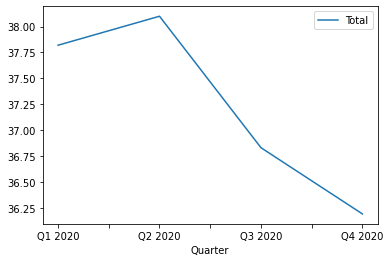

In [336]:
risk_exposure.plot()

In [334]:
subset_ESRR.to_csv("ESRR_all.csv")

In [335]:
risk_exposure.to_csv("risk_exposure.csv")

## Second and Third Answers

### What projects have had increased ESRRs between Q1 2020 and Q4 2020? They were 75 projects that have had increase ESRR

### What projects have had decreased ESRRs between Q1 2020 and Q4 2020? They were 9 projects that have had decreased ESRR at the samne period.

In [522]:
subset2_ESRR = merge[["ESRR", 'id_project', "year", "Quarter"]]
subset2_ESRR

,ESRR,id_project,year,Quarter
0,2.Moderate,BA-G9002,2020,Q1 2020
1,3.Substantial,BA-L9025,2020,Q1 2020
2,1.Low,BA-L9032,2020,Q1 2020
3,3.Substantial,BA-L9033,2020,Q1 2020
4,2.Moderate,BA-L9034,2020,Q1 2020
...,...,...,...,...
4756,3.Substantial,US-L9976,2020,Q4 2020
4757,3.Substantial,US-L9997,2020,Q4 2020
4758,4.High,ZN-L9029,2020,Q4 2020
4759,4.High,ZN-L9033,2020,Q4 2020


In [523]:
subset2_ESRR[['Quarter2','year2']] = subset2_ESRR['Quarter'].str.split(" ",expand=True,)
subset2_ESRR

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy [frame.py:3065]


,ESRR,id_project,year,Quarter,Quarter2,year2
0,2.Moderate,BA-G9002,2020,Q1 2020,Q1,2020
1,3.Substantial,BA-L9025,2020,Q1 2020,Q1,2020
2,1.Low,BA-L9032,2020,Q1 2020,Q1,2020
3,3.Substantial,BA-L9033,2020,Q1 2020,Q1,2020
4,2.Moderate,BA-L9034,2020,Q1 2020,Q1,2020
...,...,...,...,...,...,...
4756,3.Substantial,US-L9976,2020,Q4 2020,Q4,2020
4757,3.Substantial,US-L9997,2020,Q4 2020,Q4,2020
4758,4.High,ZN-L9029,2020,Q4 2020,Q4,2020
4759,4.High,ZN-L9033,2020,Q4 2020,Q4,2020


In [524]:
subset2_ESRR = subset2_ESRR.replace(to_replace ="#¡REF!",
                 value =np.nan)


In [525]:
del subset2_ESRR['Quarter']
del subset2_ESRR['year2']

In [526]:
subset2_ESRR = subset2_ESRR[subset2_ESRR["year"]==2020]

subset2_ESRR = subset2_ESRR.groupby(["id_project", "ESRR","Quarter2"], dropna=False).count().reset_index()
subset2_ESRR

,id_project,ESRR,Quarter2,year
0,BA-G9002,2.Moderate,Q1,1
1,BA-G9002,2.Moderate,Q2,1
2,BA-G9002,2.Moderate,Q3,1
3,BA-G9002,2.Moderate,Q4,1
4,BA-L9025,3.Substantial,Q1,1
...,...,...,...,...
2665,NaN,3.Substantial,Q3,6
2666,NaN,3.Substantial,Q4,6
2667,NaN,4.High,Q2,3
2668,NaN,4.High,Q3,2


In [527]:

duplicateRowsDF = subset2_ESRR[subset2_ESRR.duplicated(['ESRR'])]
duplicateRowsDF.dropna()


,id_project,ESRR,Quarter2,year
1,BA-G9002,2.Moderate,Q2,1
2,BA-G9002,2.Moderate,Q3,1
3,BA-G9002,2.Moderate,Q4,1
5,BA-L9025,3.Substantial,Q2,1
6,BA-L9025,3.Substantial,Q3,1
...,...,...,...,...
2652,ZN-L9033,4.High,Q4,1
2653,ZN-L9097,2.Moderate,Q1,1
2654,ZN-L9097,2.Moderate,Q2,1
2655,ZN-L9097,2.Moderate,Q3,1


In [528]:
index_names = duplicateRowsDF[ duplicateRowsDF['year'] == 4 ].index
  
# drop these row indexes
# from dataFrame
duplicateRowsDF.drop(index_names, inplace = True)

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy [frame.py:4169]


In [529]:
duplicateRowsDF = duplicateRowsDF.groupby(["id_project", "ESRR", "year"]).count().reset_index()
duplicateRowsDF

,id_project,ESRR,year,Quarter2
0,BA-G9002,2.Moderate,1,3
1,BA-L9025,3.Substantial,1,3
2,BA-L9032,1.Low,1,3
3,BA-L9033,3.Substantial,1,4
4,BA-L9034,2.Moderate,1,4
...,...,...,...,...
795,US-L9997,3.Substantial,1,3
796,US-L9997,4.High,1,1
797,ZN-L9029,4.High,1,4
798,ZN-L9033,4.High,1,4


In [530]:
v = duplicateRowsDF.id_project.value_counts()

In [531]:
projects_variation = duplicateRowsDF[duplicateRowsDF.id_project.isin(v.index[v.gt(1)])]

In [532]:
projects_variation

,id_project,ESRR,year,Quarter2
6,BA-L9043,2.Moderate,1,3
7,BA-L9043,3.Substantial,1,1
58,BO-L9906,3.Substantial,1,3
59,BO-L9906,4.High,1,1
94,CR-L9032,3.Substantial,1,2
...,...,...,...,...
760,US-L9499B,2.Moderate,1,1
793,US-L9976,3.Substantial,1,2
794,US-L9976,4.High,1,2
795,US-L9997,3.Substantial,1,3


In [478]:
# To compare we need a pivot table

projects_variation

,id_project,ESRR,year
0,BA-L9043,2.Moderate,3
1,BA-L9043,3.Substantial,1
18,BO-L9906,3.Substantial,3
19,BO-L9906,4.High,1
28,CR-L9032,3.Substantial,2
...,...,...,...
228,US-L9499B,2.Moderate,1
241,US-L9976,3.Substantial,2
242,US-L9976,4.High,2
243,US-L9997,3.Substantial,3


In [550]:
projects = projects_variation.reset_index()
quarters = subset2_ESRR.reset_index()

In [555]:
quarters = quarters[["index", "id_project", "Quarter2"]]
quarters

,index,id_project,Quarter2
0,0,BA-G9002,Q1
1,1,BA-G9002,Q2
2,2,BA-G9002,Q3
3,3,BA-G9002,Q4
4,4,BA-L9025,Q1
...,...,...,...
2665,2665,NaN,Q3
2666,2666,NaN,Q4
2667,2667,NaN,Q2
2668,2668,NaN,Q3


In [552]:
projects[['Level_ESRR','Desc_ESRR']] = projects['ESRR'].str.split(".",expand=True,)
projects

,index,id_project,ESRR,year,Quarter2,Level_ESRR,Desc_ESRR
0,6,BA-L9043,2.Moderate,1,3,2,Moderate
1,7,BA-L9043,3.Substantial,1,1,3,Substantial
2,58,BO-L9906,3.Substantial,1,3,3,Substantial
3,59,BO-L9906,4.High,1,1,4,High
4,94,CR-L9032,3.Substantial,1,2,3,Substantial
...,...,...,...,...,...,...,...
83,760,US-L9499B,2.Moderate,1,1,2,Moderate
84,793,US-L9976,3.Substantial,1,2,3,Substantial
85,794,US-L9976,4.High,1,2,4,High
86,795,US-L9997,3.Substantial,1,3,3,Substantial


In [603]:
new_df = pd.merge(projects, quarters,  how='left', left_on=["index"], right_on = ["index"])
new_df

,index,id_project_x,ESRR,year,Quarter2_x,Level_ESRR,Desc_ESRR,id_project_y,Quarter2_y
0,6,BA-L9043,2.Moderate,1,3,2,Moderate,BA-L9025,Q3
1,7,BA-L9043,3.Substantial,1,1,3,Substantial,BA-L9025,Q4
2,58,BO-L9906,3.Substantial,1,3,3,Substantial,BH-L9037,Q2
3,59,BO-L9906,4.High,1,1,4,High,BH-L9037,Q3
4,94,CR-L9032,3.Substantial,1,2,3,Substantial,BL-G9004,Q4
...,...,...,...,...,...,...,...,...,...
83,760,US-L9499B,2.Moderate,1,1,2,Moderate,HA-L9089,Q3
84,793,US-L9976,3.Substantial,1,2,3,Substantial,HA-L9904,Q2
85,794,US-L9976,4.High,1,2,4,High,HA-L9904,Q3
86,795,US-L9997,3.Substantial,1,3,3,Substantial,HA-L9904,Q4


In [604]:
new_df.reset_index()

,level_0,index,id_project_x,ESRR,year,Quarter2_x,Level_ESRR,Desc_ESRR,id_project_y,Quarter2_y
0,0,6,BA-L9043,2.Moderate,1,3,2,Moderate,BA-L9025,Q3
1,1,7,BA-L9043,3.Substantial,1,1,3,Substantial,BA-L9025,Q4
2,2,58,BO-L9906,3.Substantial,1,3,3,Substantial,BH-L9037,Q2
3,3,59,BO-L9906,4.High,1,1,4,High,BH-L9037,Q3
4,4,94,CR-L9032,3.Substantial,1,2,3,Substantial,BL-G9004,Q4
...,...,...,...,...,...,...,...,...,...,...
83,83,760,US-L9499B,2.Moderate,1,1,2,Moderate,HA-L9089,Q3
84,84,793,US-L9976,3.Substantial,1,2,3,Substantial,HA-L9904,Q2
85,85,794,US-L9976,4.High,1,2,4,High,HA-L9904,Q3
86,86,795,US-L9997,3.Substantial,1,3,3,Substantial,HA-L9904,Q4


In [596]:
new_df = new_df[["id_project_x", "Quarter2_y", "Level_ESRR"]]
new_df

,id_project_x,Quarter2_y,Level_ESRR
0,BA-L9043,Q3,2
1,BA-L9043,Q4,3
2,BO-L9906,Q2,3
3,BO-L9906,Q3,4
4,CR-L9032,Q4,3
...,...,...,...
83,US-L9499B,Q3,2
84,US-L9976,Q2,3
85,US-L9976,Q3,4
86,US-L9997,Q4,3


In [618]:
Projects_with_Variation = new_df.pivot(index=["ESRR"], columns=["id_project_x","Quarter2_y"], values="Level_ESRR")
Projects_with_Variation

id_project_x  BA-L9043      BO-L9906      CR-L9032 DR-L9934      DR-L9935  \
Quarter2_y          Q3   Q4       Q2   Q3       Q4       Q2   Q3       Q4   
ESRR                                                                        
0.Not Rated        NaN  NaN      NaN  NaN      NaN      NaN  NaN      NaN   
1.Low              NaN  NaN      NaN  NaN      NaN      NaN  NaN      NaN   
2.Moderate           2  NaN      NaN  NaN      NaN      NaN  NaN      NaN   
3.Substantial      NaN    3        3  NaN        3        3  NaN        3   
4.High             NaN  NaN      NaN    4        4      NaN    4      NaN   

id_project_x       EC-J0006  ... US-L9300 US-L9335      US-L9499 US-L9499B  \
Quarter2_y      Q1       Q4  ...       Q3       Q4   Q1       Q4        Q2   
ESRR                         ...                                             
0.Not Rated    NaN        0  ...      NaN      NaN  NaN      NaN       NaN   
1.Low          NaN      NaN  ...      NaN      NaN  NaN        1         1   
2.Moderate     NaN      NaN  ...      NaN      NaN  NaN        2       NaN   
3.Substantial  NaN      NaN  ...      NaN        3  NaN      NaN       NaN   
4.High           4      NaN  ...        4      NaN    4      NaN       NaN   

id_project_x       US-L9976      US-L9997       
Quarter2_y      Q3       Q2   Q3       Q4   Q1  
ESRR                                            
0.Not Rated    NaN      NaN  NaN      NaN  NaN  
1.Low          NaN      NaN  NaN      NaN  NaN  
2.Moderate       2      NaN  NaN      NaN  NaN  
3.Substantial  NaN        3  NaN        3  NaN  
4.High         NaN      NaN    4      NaN    4  

[5 rows x 84 columns]

In [624]:
final_df = Projects_with_Variation.fillna("")
final_df

id_project_x  BA-L9043    BO-L9906    CR-L9032 DR-L9934    DR-L9935     \
Quarter2_y          Q3 Q4       Q2 Q3       Q4       Q2 Q3       Q4 Q1   
ESRR                                                                     
0.Not Rated                                                              
1.Low                                                                    
2.Moderate           2                                                   
3.Substantial           3        3           3        3           3      
4.High                              4        4           4           4   

id_project_x  EC-J0006  ... US-L9300 US-L9335    US-L9499 US-L9499B     \
Quarter2_y          Q4  ...       Q3       Q4 Q1       Q4        Q2 Q3   
ESRR                    ...                                              
0.Not Rated          0  ...                                              
1.Low                   ...                             1         1      
2.Moderate              ...                             2            2   
3.Substantial           ...                 3                            
4.High                  ...        4           4                         

id_project_x  US-L9976    US-L9997     
Quarter2_y          Q2 Q3       Q4 Q1  
ESRR                                   
0.Not Rated                            
1.Low                                  
2.Moderate                             
3.Substantial        3           3     
4.High                  4           4  

[5 rows x 84 columns]

In [622]:
final_df.to_csv("final_df.csv")

In [625]:
Projects_with_Variation2 = new_df.pivot(index=["id_project_x","Quarter2_y"], columns=["ESRR"], values="Level_ESRR")
Projects_with_Variation2

ESRR                    0.Not Rated 1.Low 2.Moderate 3.Substantial 4.High
id_project_x Quarter2_y                                                  
BA-L9043     Q3                 NaN   NaN          2           NaN    NaN
             Q4                 NaN   NaN        NaN             3    NaN
BO-L9906     Q2                 NaN   NaN        NaN             3    NaN
             Q3                 NaN   NaN        NaN           NaN      4
CR-L9032     Q4                 NaN   NaN        NaN             3      4
...                             ...   ...        ...           ...    ...
US-L9499B    Q3                 NaN   NaN          2           NaN    NaN
US-L9976     Q2                 NaN   NaN        NaN             3    NaN
             Q3                 NaN   NaN        NaN           NaN      4
US-L9997     Q1                 NaN   NaN        NaN           NaN      4
             Q4                 NaN   NaN        NaN             3    NaN

[84 rows x 5 columns]

In [627]:
final_df2 = Projects_with_Variation2.fillna("")
final_df2

ESRR                    0.Not Rated 1.Low 2.Moderate 3.Substantial 4.High
id_project_x Quarter2_y                                                  
BA-L9043     Q3                                    2                     
             Q4                                                  3       
BO-L9906     Q2                                                  3       
             Q3                                                         4
CR-L9032     Q4                                                  3      4
...                             ...   ...        ...           ...    ...
US-L9499B    Q3                                    2                     
US-L9976     Q2                                                  3       
             Q3                                                         4
US-L9997     Q1                                                         4
             Q4                                                  3       

[84 rows x 5 columns]

In [628]:
final_df2.to_csv("final_df2.csv")

In [630]:
final_df2 = final_df2.reset_index()
final_df2

ESRR,index,id_project_x,Quarter2_y,0.Not Rated,1.Low,2.Moderate,3.Substantial,4.High
0,0,BA-L9043,Q3,,,2,,
1,1,BA-L9043,Q4,,,,3,
2,2,BO-L9906,Q2,,,,3,
3,3,BO-L9906,Q3,,,,,4
4,4,CR-L9032,Q4,,,,3,4
...,...,...,...,...,...,...,...,...
79,79,US-L9499B,Q3,,,2,,
80,80,US-L9976,Q2,,,,3,
81,81,US-L9976,Q3,,,,,4
82,82,US-L9997,Q1,,,,,4


# Answer Four

### -	What could have been the main reasons that explain the trend?

In [638]:
merge[['Quarter2','year']] = merge['Quarter'].str.split(" ",expand=True,)
merge

,Quarter,year,id_project,category,ESRR,SPR,REGION,SECTOR,Sector_1,Region_1,Operation_Type,Stage,Approval,Quarter2
0,Q1 2020,2020,BA-G9002,B,2.Moderate,{Not Set},CAR,INE,INE,CAR,Investment Grants,Operation in Disbursing,07/29/15,Q1
1,Q1 2020,2020,BA-L9025,A,3.Substantial,Satisfactory,CAR,INE,INE,CAR,Loan Operation,Operation in Disbursing,02/03/2014,Q1
2,Q1 2020,2020,BA-L9032,C,1.Low,{Not Set},CAR,SCL,SCL,CAR,Loan Operation,Operation in Disbursing,11/28/12,Q1
3,Q1 2020,2020,BA-L9033,B,3.Substantial,{Not Set},CAR,CSD,CSD,CAR,Loan Operation,Operation in Disbursing,11/02/2011,Q1
4,Q1 2020,2020,BA-L9034,B13,2.Moderate,{Not Set},CAR,IFD,IFD,CAR,Loan Operation,Fully Disbursed,01/11/2011,Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4756,Q4 2020,2020,US-L9976,B,3.Substantial,Partially Unsatisfactory,NAC,CSD,CSD,NAC,Loan Operation,Operation in Disbursing,05/15/20,Q4
4757,Q4 2020,2020,US-L9997,B,3.Substantial,Partially Satisfactory,NAC,CSD,CSD,NAC,Loan Operation,Fully Disbursed,10/13/15,Q4
4758,Q4 2020,2020,ZN-L9029,C,4.High,Partially Satisfactory,LATAM,INE,INE,LATAM,Loan Operation,Operation in Disbursing,12/12/2018,Q4
4759,Q4 2020,2020,ZN-L9033,B,4.High,Partially Satisfactory,LATAM,INE,INE,LATAM,Loan Operation,Operation in Disbursing,12/13/19,Q4


In [639]:
# Let's see the other variables

merge3 = pd.merge(final_df2, merge,  how='left', left_on=["id_project_x", "Quarter2_y"], right_on = ["id_project", "Quarter2"])
merge3

,index,id_project_x,Quarter2_y,0.Not Rated,1.Low,2.Moderate,3.Substantial,4.High,Quarter,year,...,ESRR,SPR,REGION,SECTOR,Sector_1,Region_1,Operation_Type,Stage,Approval,Quarter2
0,0,BA-L9043,Q3,,,2,,,Q3 2020,2020,...,2.Moderate,{Not Set},CAR,INE,INE,CAR,Loan Operation,Operation in Disbursing,07/23/14,Q3
1,1,BA-L9043,Q4,,,,3,,Q4 2019,2019,...,2.Moderate,{Not Set},CAR,INE,INE,CAR,Loan Operation,Operation in Disbursing,07/23/14,Q4
2,1,BA-L9043,Q4,,,,3,,Q4 2020,2020,...,3.Substantial,Satisfactory,CAR,INE,INE,CAR,Loan Operation,Operation in Disbursing,07/23/14,Q4
3,2,BO-L9906,Q2,,,,3,,Q2 2020,2020,...,3.Substantial,Partially Satisfactory,LATAM,CSD,CSD,LATAM,Loan Operation,Operation in Disbursing,12/08/2010,Q2
4,3,BO-L9906,Q3,,,,,4,Q3 2020,2020,...,3.Substantial,Partially Satisfactory,LATAM,CSD,CSD,LATAM,Loan Operation,Operation in Disbursing,12/08/2010,Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,82,US-L9997,Q1,,,,,4,Q1 2020,2020,...,4.High,Partially Satisfactory,NAC,CSD,CSD,NAC,Loan Operation,Fully Disbursed,10/13/15,Q1
131,82,US-L9997,Q1,,,,,4,Q1 2021,2021,...,3.Substantial,Partially Satisfactory,NAC,CSD,CSD,NAC,Loan Operation,Fully Disbursed,10/13/15,Q1
132,83,US-L9997,Q4,,,,3,,Q4 2018,2018,...,3.Substantial,{Not Set},NAC,CSD,CSD,NAC,Loan Operation,Fully Disbursed,10/13/15,Q4
133,83,US-L9997,Q4,,,,3,,Q4 2019,2019,...,4.High,Partially Satisfactory,NAC,CSD,CSD,NAC,Loan Operation,Fully Disbursed,10/13/15,Q4


In [648]:
# what happend with those who reduce their risk, is ther a trend: 
reducers = ["EC-J0006", "HO-L9986", "HO-L9988", "PN-L9072", "RG-L9996", "SU-L9055", "TT-L9042", "US-L9335", "US-L9997"]

reducers2 = merge3[merge3["id_project_x"].isin(reducers)] 

reducers2


,index,id_project_x,Quarter2_y,0.Not Rated,1.Low,2.Moderate,3.Substantial,4.High,Quarter,year,...,ESRR,SPR,REGION,SECTOR,Sector_1,Region_1,Operation_Type,Stage,Approval,Quarter2
14,9,EC-J0006,Q1,,1,,,,Q1 2021,2021,...,1.Low,{Not Set},LATAM,SCL,SCL,LATAM,Grant Financing Product,Operation in Disbursing,01/15/20,Q1
15,10,EC-J0006,Q4,0,,,,,Q4 2020,2020,...,1.Low,{Not Set},LATAM,SCL,SCL,LATAM,Grant Financing Product,Operation in Disbursing,01/15/20,Q4
30,21,HO-L9986,Q1,,,,,4,Q1 2020,2020,...,4.High,{Not Set},AAN,INE,INE,AAN,Loan Operation,Operation in Disbursing,02/08/2017,Q1
31,21,HO-L9986,Q1,,,,,4,Q1 2021,2021,...,3.Substantial,Satisfactory,AAN,INE,INE,AAN,Loan Operation,Operation in Disbursing,02/08/2017,Q1
32,22,HO-L9986,Q4,,,,3,,Q4 2018,2018,...,4.High,{Not Set},AAN,INE,INE,AAN,Loan Operation,Operation in Disbursing,02/08/2017,Q4
33,22,HO-L9986,Q4,,,,3,,Q4 2019,2019,...,4.High,{Not Set},AAN,INE,INE,AAN,Loan Operation,Operation in Disbursing,02/08/2017,Q4
34,22,HO-L9986,Q4,,,,3,,Q4 2020,2020,...,3.Substantial,Satisfactory,AAN,INE,INE,AAN,Loan Operation,Operation in Disbursing,02/08/2017,Q4
35,23,HO-L9988,Q1,,,,3,,Q1 2020,2020,...,2.Moderate,{Not Set},AAN,SCL,SCL,AAN,Loan Operation,Operation in Disbursing,11/08/2017,Q1
36,23,HO-L9988,Q1,,,,3,,Q1 2021,2021,...,2.Moderate,{Not Set},AAN,SCL,SCL,AAN,Loan Operation,Operation in Disbursing,11/08/2017,Q1
37,24,HO-L9988,Q3,,,2,,,Q3 2020,2020,...,2.Moderate,{Not Set},AAN,SCL,SCL,AAN,Loan Operation,Operation in Disbursing,11/08/2017,Q3


In [643]:
# what happend with those who increse their risk in the same quarter?

suddenly = ["PN-L9929", "CR-L9032", "UR-L9949", "US-L9499"]


suddenly = merge3[merge3["id_project_x"].isin(suddenly)] 

In [644]:
suddenly

,index,id_project_x,Quarter2_y,0.Not Rated,1.Low,2.Moderate,3.Substantial,4.High,Quarter,year,...,ESRR,SPR,REGION,SECTOR,Sector_1,Region_1,Operation_Type,Stage,Approval,Quarter2
5,4,CR-L9032,Q4,,,,3,4,Q4 2018,2018,...,3.Substantial,Partially Satisfactory,AAN,INE,INE,AAN,Loan Operation,Operation in Disbursing,11/01/2012,Q4
6,4,CR-L9032,Q4,,,,3,4,Q4 2019,2019,...,3.Substantial,Partially Unsatisfactory,AAN,INE,INE,AAN,Loan Operation,Operation in Disbursing,11/01/2012,Q4
7,4,CR-L9032,Q4,,,,3,4,Q4 2020,2020,...,4.High,Partially Satisfactory,AAN,INE,INE,AAN,Loan Operation,Operation in Disbursing,11/01/2012,Q4
63,41,PN-L9929,Q1,,,2,3,,Q1 2020,2020,...,3.Substantial,Satisfactory,AAN,INE,INE,AAN,Loan Operation,Operation in Disbursing,08/30/12,Q1
64,41,PN-L9929,Q1,,,2,3,,Q1 2021,2021,...,2.Moderate,Satisfactory,AAN,INE,INE,AAN,Loan Operation,Operation in Disbursing,08/30/12,Q1
111,70,UR-L9949,Q4,,,2,3,,Q4 2018,2018,...,2.Moderate,{Not Set},NAC,INE,INE,NAC,Loan Operation,Operation in Disbursing,09/16/20,Q4
112,70,UR-L9949,Q4,,,2,3,,Q4 2019,2019,...,1.Low,{Not Set},NAC,SCL,INE,NAC,Loan Operation,Operation in Disbursing,09/16/20,Q4
113,70,UR-L9949,Q4,,,2,3,,Q4 2020,2020,...,3.Substantial,Partially Satisfactory,NAC,INE,INE,NAC,Loan Operation,Operation in Disbursing,09/16/20,Q4
123,77,US-L9499,Q4,,1,2,,,Q4 2018,2018,...,2.Moderate,{Not Set},NAC,INE,INE,NAC,Loan Operation,Operation in Disbursing,12/16/13,Q4
124,77,US-L9499,Q4,,1,2,,,Q4 2019,2019,...,1.Low,{Not Set},NAC,IFD,INE,NAC,Loan Operation,Operation in Disbursing,12/16/13,Q4


In [649]:
merge3.to_csv("who_moves.csv")
suddenly.to_csv("who_suddenly.csv")
reducers2.to_csv("who_reducer.csv")